# Question 1 

## a i)

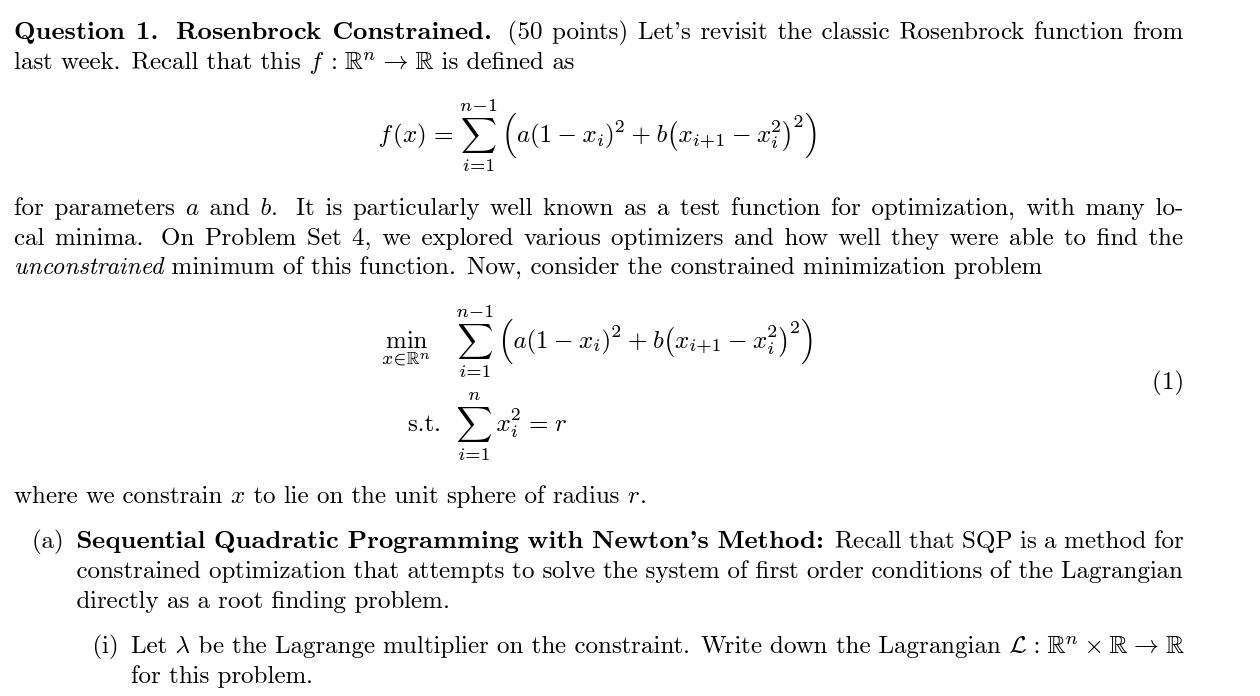

let $f(x_i)$ be the Rosenbrock function defined above. The lagrangian is:

$$ \mathcal{L}(x_{i}, \lambda) = f(x_{i}) - \lambda ( \sum_{i=1}^{n} x_{i}^{2} - r)$$

## a ii)

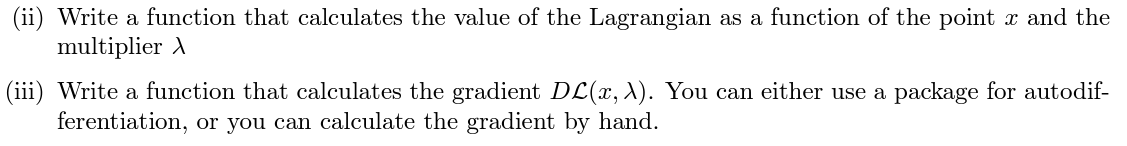



In [43]:
#first we define the rosenbrock function with unknown parameters a and b 
def rosenbrock(x,a = 1,b = 1):
    return sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 )

def constraint(x,r=2):
    return np.sum(x**2) - r


#lagrangian
def lagrangian(x,a = 1,b = 1, lamda = 0, r=2): #output should be a 1 dimensional scalar value 
    return sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) - lamda * (np.sum(x**2) - r)

def lagrangian_gradient_func(x, lamda, r = 2, a=1 , b=1):
    ''' Input parameters x, lamda, r=2, a=1 , b =1 
    output an (n+1 array) of gradients with the last element corresponding to lamda
    '''
    n = len(x)
    gradient_x = np.zeros(n)
    for i in range(n - 1):
        gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
        gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
    gradient_x = gradient_x - 2 * lamda * x
    gradient_lambda = np.sum(x**2) - r
    return np.concatenate((gradient_x, [gradient_lambda]))

#testcase
x = np.array([1, 2])
lamda = 0.5
r = 2

gradient = lagrangian_gradient_func(x, lamda, r)
# gradient2 = lagrangian_gradient_func_2(x, lamda, r)
print(gradient)
# print(gradient2)


[-5.  0.  3.]


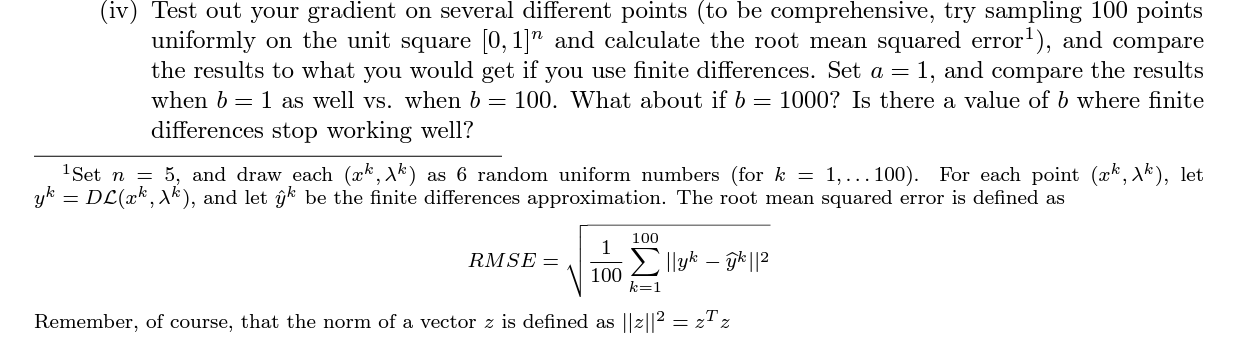

In [25]:

def finite_difference_gradient(x, lamda = 0,a = 1, b=1, r = 2, h = 1e-6):
    n = len(x)
    gradient_x = np.zeros(n)
    for i in range(n):
        x_plus = x.copy()
        x_plus[i] += h
        x_minus = x.copy()
        x_minus[i] -= h
        gradient_x[i] = (lagrangian(x_plus, lamda, r) - lagrangian(x_minus, lamda, r)) / (2 * h)
    lamda_plus = lamda + h
    lamda_minus = lamda - h
    gradient_lambda = (lagrangian(x, lamda_plus, r) - lagrangian(x, lamda_minus, r)) / (2 * h)
    return np.concatenate((gradient_x, [gradient_lambda]))

lamda = 0

# x = np.random.rand(n)
# y = np.concatenate((x, [lamda]))
# finite_difference = np.array(approx_fprime(y, lagrangian, epsilon=1e-6))
# print(finite_difference)

### all three in on go 
n = 5
num_samples = 100
error_b1 = 0
error_b100 = 0
error_b1000 = 0

for i in range(num_samples):
    x = np.random.rand(n)
    lamda = np.random.rand()
    true_gradient_b1 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=1))
    finite_diff_gradient_b1 = np.array(finite_difference_gradient(x, lamda, r=2, b=1))
    error_b1 += np.sum((np.abs(true_gradient_b1 - finite_diff_gradient_b1))**2)
    
    true_gradient_b100 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=100))
    finite_diff_gradient_b100 = np.array(finite_difference_gradient(x, lamda, r=2, b=100))
    error_b100 += np.sum((np.abs(true_gradient_b100 - finite_diff_gradient_b100))**2)
    
    true_gradient_b1000 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=1000))
    finite_diff_gradient_b1000 = np.array(finite_difference_gradient(x, lamda, r=2, b=1000))
    error_b1000 += np.sum((np.abs(true_gradient_b1000 - finite_diff_gradient_b1000))**2)

error_b1 = np.sqrt(error_b1 / num_samples)
error_b100 = np.sqrt(error_b100 / num_samples)
error_b1000 = np.sqrt(error_b1000 / num_samples)

print("Root mean squared error for b=1:", error_b1)
print("Root mean squared error for b=100:", error_b100)
print("Root mean squared error for b=1000:", error_b1000)
print('the increasing root mean squared error suggests finite difference does terribly for larger b')


Root mean squared error for b=1: 2.1430525765827815
Root mean squared error for b=100: 190.43540481061453
Root mean squared error for b=1000: 1924.8743862785027
the increasing root mean squared error suggests finite difference does terribly for larger b


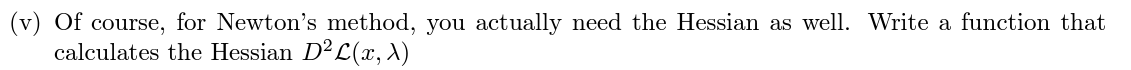

In [26]:
def lagrangian_hessian_func(x, lamda = 0.5, r = 2, a=1 , b=1):
    n = len(x)
    hessian = np.zeros((n + 1, n + 1))
    for i in range(n - 1):
        hessian[i, i] = 2 * a + 2 * lamda
        hessian[i, i+1] = -2 * b
        hessian[i+1, i] = -2 * b
        hessian[i+1, i+1] = 2 * b + 2 * lamda
    hessian[n-1, n-1] = 2 * b + 2 * lamda
    hessian[n, n] = 0
    for i in range(n):
        hessian[i, n] = -2 * x[i]
        hessian[n, i] = -2 * x[i]
    return hessian

a = 1
b = 1
x = np.array([0.5,0.5])
hessian = lagrangian_hessian_func(x, lamda = 0.5)
print(hessian)

rank = np.linalg.matrix_rank(hessian)
if rank == hessian.shape[1]:
    print("Matrix is invertible.")
else:
    print("Matrix is not invertible.")

[[ 3. -2. -1.]
 [-2.  3. -1.]
 [-1. -1.  0.]]
Matrix is invertible.


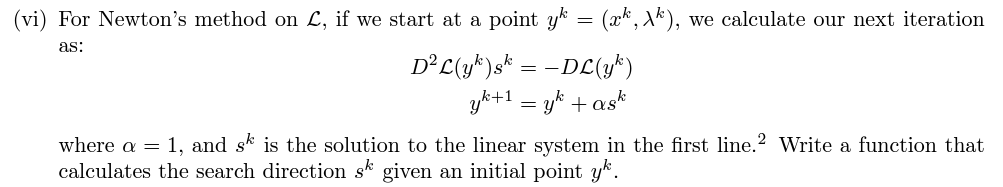

In [27]:


def search_direction(y, a=1, b=1, r=2):
    '''input array 'y' where the first n elements correspond to the x_i values and the n+1'th value corresponds to lamda'''
    n = len(y) - 1
    gradient = lagrangian_gradient_func(y[:n], y[n], r, a, b)
    hessian = lagrangian_hessian_func(y[:n], y[n], r, a, b)
    s = np.linalg.solve(hessian, -gradient)
    return s



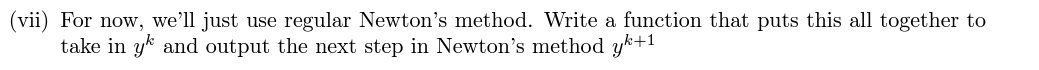

In [28]:
def newton_step(y, a=1, b=1, r=2, alpha = 1):
    s = search_direction(y, a, b, r)
    alpha = 1
    Y = y + alpha * s
    return Y

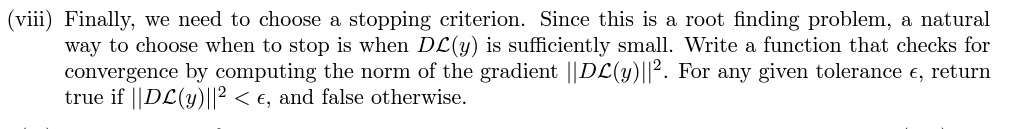

In [29]:
def check_convergence(y, a=1, b=1, r=2, epsilon=1e-6):
    gradient = lagrangian_gradient_func(y[:-1], y[-1], r, a, b)
    norm = np.linalg.norm(gradient)
    if norm < epsilon:
        return True
    else:
        return False

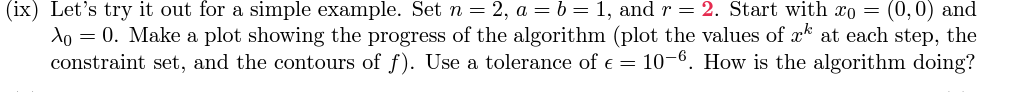

In [51]:
def newton_method(x0, lambda0, a=1, b=1, r=2, epsilon=1e-6, max_iter=1000):
    y0 = np.concatenate((x0, [lambda0])) #initial guess
    y = y0
    for iter in range(max_iter):
        y_new = newton_step(y, a, b, r) #does search_direction first then, adds it to the prev value
        if check_convergence(y_new, a, b, r, epsilon):
            break
        y = y_new
    x_min = y[:-1]
    lambda_min = y[-1]
    return x_min, lambda_min


# Initial point
x0 = np.array([0.99, 0.99]) #because [0,0] would make the hessian singular
lambda0 = 0.5

# Parameters
a = 1
b = 1
r = 2
epsilon = 1e-6
max_iter = 1000

# Newton's method
x_min, lambda_min = newton_method(x0, lambda0, a, b, r, epsilon, max_iter)

print("Minimum x:", x_min)
print("Minimum lambda:", lambda_min)

#I have no idea why it doesnt converge
def newton_method_lagrangian(x0, lamda0, r=2, max_iter=100, tol=1e-6, a=1, b=1):
    x = x0
    lamda = lamda0
    n = len(x0)
    for i in range(max_iter):
        gradient = lagrangian_gradient_func(x, lamda, r, a, b)
        hessian = lagrangian_hessian_func(x, lamda, r, a, b)
        delta = np.linalg.solve(hessian, -gradient)
        x = x + delta[:n]
        lamda = lamda + delta[n]
        if np.linalg.norm(gradient) < tol:
            break
    return x, lamda

x0 = np.array([0.5,0.5])

lamda0 = 0
result = newton_method_lagrangian(x0, lamda0, r=2, max_iter=100, tol=1e-6)
x_min, lamda_min = result[:-1], result[-1]
print("Minimizer of the Lagrangian:", x_min)
print("Lagrange multiplier:", lamda_min)

#still doesnt converge using the implementation above 

#now we try using scipys implementation 

def lagrangian_gradient_func_scipy(x, lamda=0, r=2, a=1, b=1):
    n = len(x)
    gradient_x = np.zeros(n)
    gradient_x[0] = 2 * a * (x[0] - 1) - 4 * b * (x[1] - x[0]**2) * x[0]
    for i in range(1, n-1):
        gradient_x[i] = 2 * a * (x[i] - 1) - 2 * b * (x[i+1] - x[i]**2) * 2 * x[i] + 2 * b * (x[i] - x[i-1]**2) * 2 * x[i-1]
    gradient_x[n-1] = 2 * b * (x[n-1] - x[n-2]**2) * 2 * x[n-2]
    gradient_lambda = np.array([np.sum(x**2) - r])
    return gradient_x

def lagrangian_hessian_func_scipy(x, lamda = 0, r = 2, a=1 , b=1):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n - 1):
        hessian[i, i] = 2 * a + 8 * b * x[i]**2
        hessian[i, i+1] = -4 * b * x[i]
        hessian[i+1, i] = -4 * b * x[i]
        hessian[i+1, i+1] = 2 * b
    hessian = hessian - 2 * lamda * np.eye(n)
    return hessian



x0 = np.array([0.0001, 0.0001])
r = 2.0

# Minimize the Lagrangian using the Newton's method
print('\n using scipys implementation')
res = minimize(fun=lagrangian, x0=x0, args=(1,1,0.5, r), method='Newton-CG',
               jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6)

# Print the optimal solution

x = res.x 
print("Optimal solution:", res.x)
print("objective =", rosenbrock(x))
print("constraint =", constraint(x))

print('scipys implementation converges hence we will use this for further discussion')

print(res)


C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:20: RuntimeWarning: overflow encountered in double_scalars
  gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:21: RuntimeWarning: overflow encountered in double_scalars
  gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:22: RuntimeWarning: overflow encountered in multiply
  gradient_x = gradient_x - 2 * lamda * x
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:22: RuntimeWarning: invalid value encountered in subtract
  gradient_x = gradient_x - 2 * lamda * x
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:23: RuntimeWarning: overflow encountered in square
  gradient_lambda = np.sum(x**2) - r


Minimum x: [nan nan]
Minimum lambda: nan
Minimizer of the Lagrangian: (array([nan, nan]),)
Lagrange multiplier: nan

 using scipys implementation
Optimal solution: [0.9999841  0.99996522]
objective = 2.61697844793719e-10
constraint = -0.00010136072176725186
scipys implementation converges hence we will use this for further discussion
     fun: 5.068062258147072e-05
     jac: array([-1.30220799e-05, -4.34122755e-06])
 message: 'Optimization terminated successfully.'
    nfev: 487
    nhev: 332
     nit: 332
    njev: 487
  status: 0
 success: True
       x: array([0.9999841 , 0.99996522])


In [42]:
def newton_method_lagrangian(x0, a=1, b=1, r=2, lamda0=0, max_iter=1000, tol=1e-6):
    x = x0
    lamda = lamda0
    # x = np.concatenate((x, [lamda]))
    for i in range(max_iter):
        gradient = lagrangian_gradient_func(x, lamda, r, a, b)
        hessian = lagrangian_hessian_func(x, lamda, r, a, b)
        dx = np.linalg.solve(hessian, -gradient)
        x = x + dx
        x_min = x[:-1]
        dlamda = x[-1]
        if np.linalg.norm(gradient) < tol:
            break
    return x_min, dlamda

#i think i figured out how to fix it so essentially gradient and hessian assumes we dont input the array of x and lamda combined
# Initial point

n = 5
x0 = np.random.rand(n)
lamda0 = 0

result = newton_method_lagrangian(x0, lamda0, r=2, max_iter=100, tol=1e-6)
x_min, lamda_min = result[:n], result[n]

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [40]:

def lagrangian_gradient_func(x, lamda = 0.5, r = 2, a=1 , b=1):
    n = len(x)
    gradient_x = np.zeros(n)
    for i in range(n - 1):
        gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
        gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
    gradient_x = gradient_x - 2 * lamda * x
    gradient_lambda = np.sum(x**2) - r
    return np.concatenate((gradient_x, [gradient_lambda]))

def lagrangian_hessian_func(x, lamda = 0.5, r = 2, a=1 , b=1):
    n = len(x)
    hessian = np.zeros((n + 1, n + 1))
    for i in range(n - 1):
        hessian[i, i] = 2 * a + 2 * lamda
        hessian[i, i+1] = -2 * b
        hessian[i+1, i] = -2 * b
        hessian[i+1, i+1] = 2 * b + 2 * lamda
    hessian[n-1, n-1] = 2 * b + 2 * lamda
    hessian[n, n] = 0
    for i in range(n):
        hessian[i, n] = -2 * x[i]
        hessian[n, i] = -2 * x[i]
    return hessian

#Test the gradient and hessian of the Lagrangian function
n = 2
x0 = np.random.rand(n)
lamda0 = 0
print("Gradient of the Lagrangian function:", lagrangian_gradient_func(x0, lamda0, r=2, a=1, b=1))
print("Hessian of the Lagrangian function:\n", lagrangian_hessian_func(x0, lamda0, r=2, a=1, b=1))
gradient = lagrangian_gradient_func(x0, lamda0, r=2, a=1, b=1)
hessian = lagrangian_hessian_func(x0, lamda0, r=2, a=1, b=1)
print(np.linalg.solve(hessian, -gradient))

Gradient of the Lagrangian function: [-2.32419153  1.58611025 -1.1674109 ]
Hessian of the Lagrangian function:
 [[ 2.         -2.         -0.55312381]
 [-2.          2.         -1.73908322]
 [-0.55312381 -1.73908322  0.        ]]
[ 0.30481621 -0.76822776 -0.32199591]


# Question 2

## a)
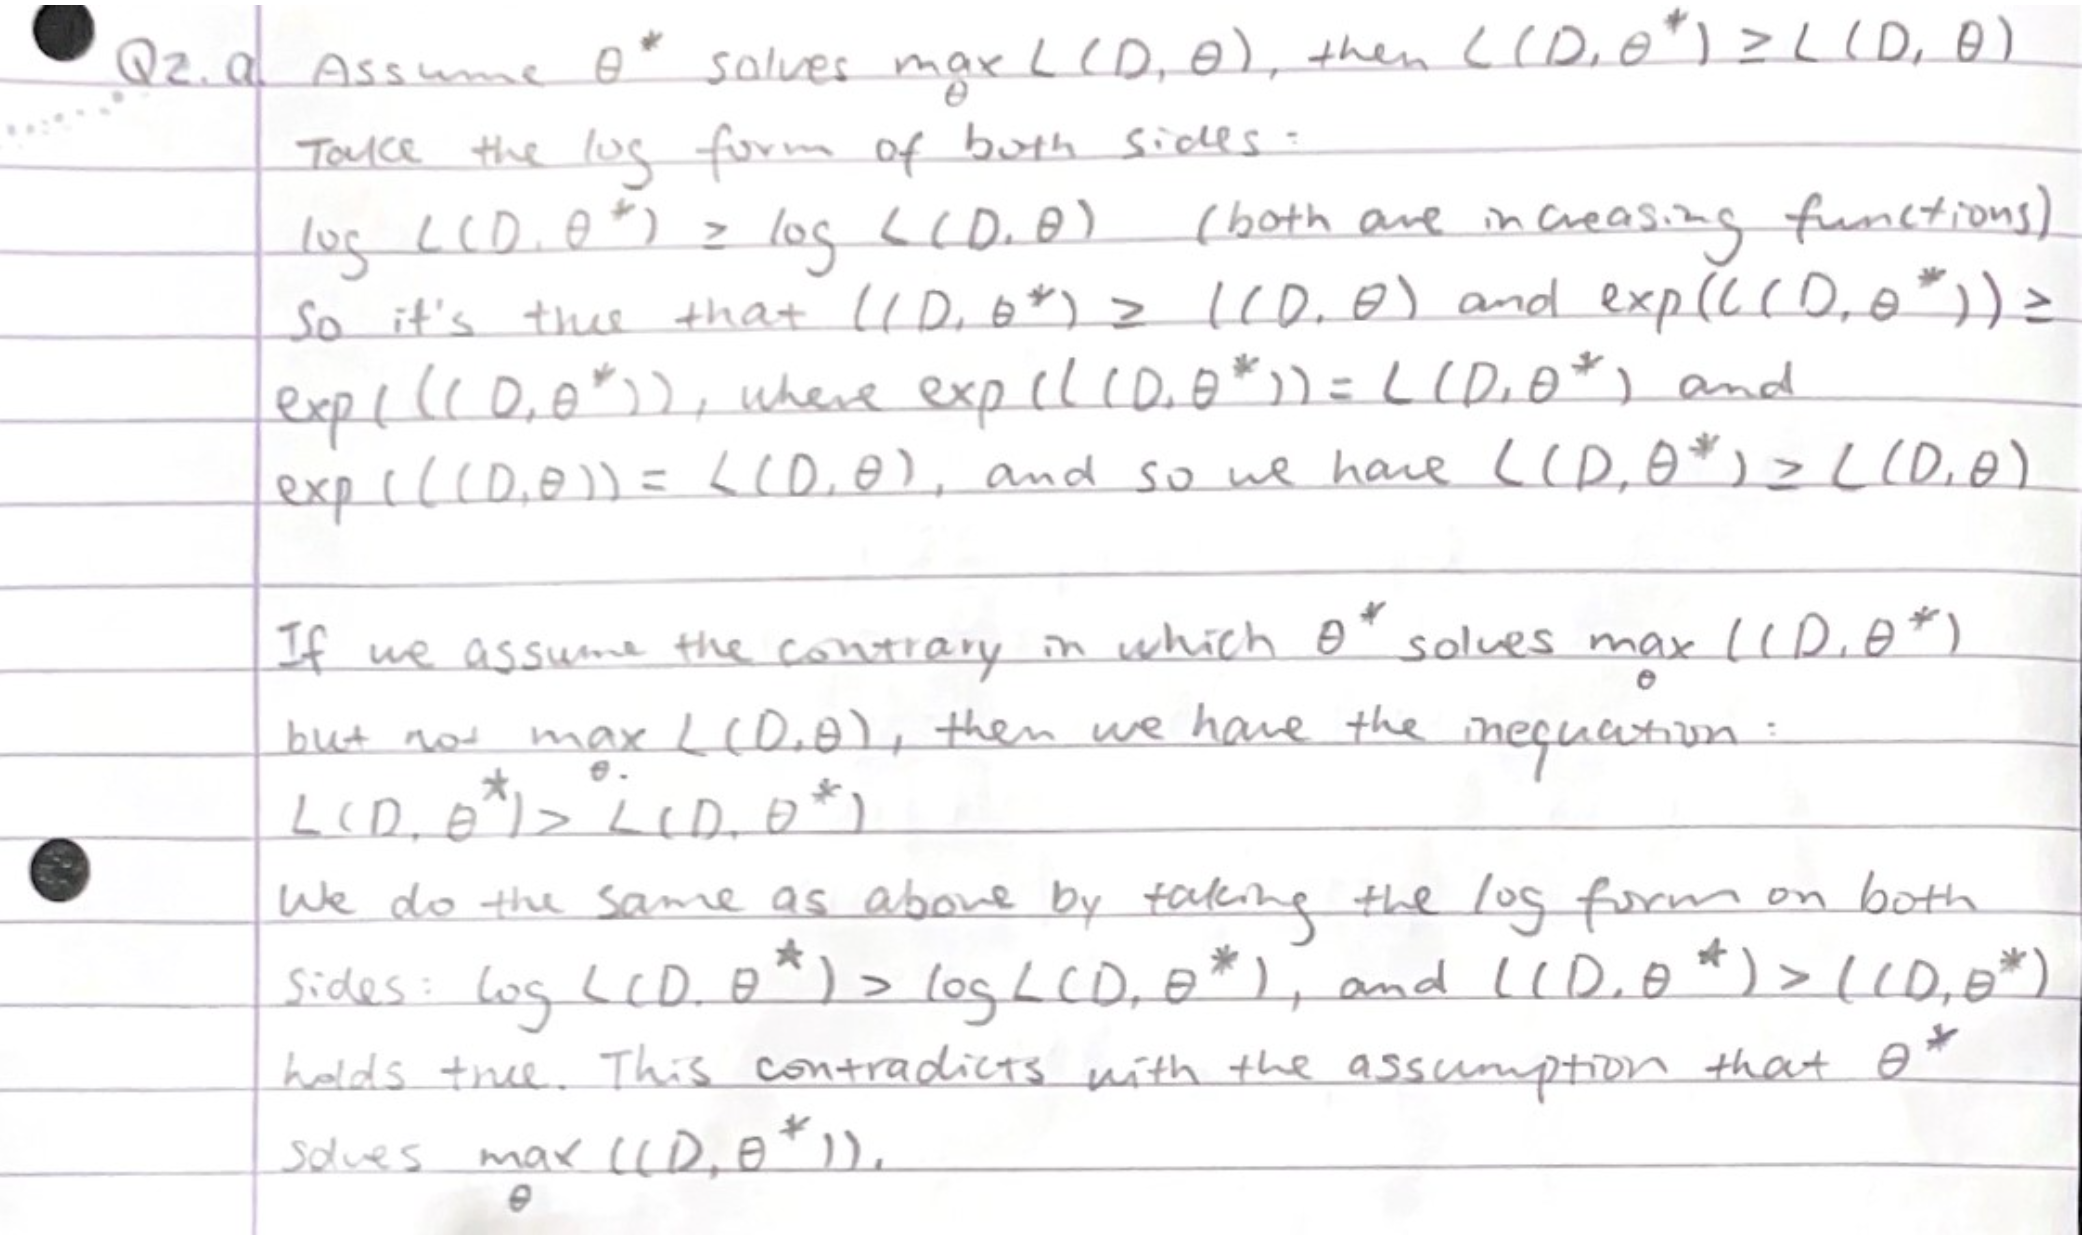







## b)
We want to avoid multiplying many small probabilities or using the exponent of a large negative value, which is the case when using $L$. 

Using the log likelihood transforms the product of probabilities into a sum of logarithms, which is more numerically stable. Furthermore $l$ is much easier to manipulate particularly when optimising for example , the gradient of $l$ is the sum of gradients of log probabilities.


We prefer working with log-likelihood funtions instead of the regular likelihood because log functions are usually "well-behaved", meaning the f''(x) does not change too rapidly, and you get a quadratic function that it is easier to optimise. Another advantge is due to the fact that computers have a limited decimal representations, and when we multiply many probabilities, this will become very close to zero. With logs we avoid this issue.

## c)

We assume that $y$ is a binary variable $[0,1]$. The sum of the probabilities for all possible outcomes is equal to 1.  Therefore the probability og $y=0$ conditional on $x$ and $\theta$ is equal to $ 1-Pr(y=1|X,\theta)$.


$Pr(y = 0|X,\theta) = \frac{\textrm{exp}(X \theta)}{1 + \textrm{exp}(X \theta)}$

## d) 

Since $y$ is binary with probabilites of $y=1$ and $y=0$. 

$\textrm{Pr}(y = 1|X, \theta) = p(X, \theta)$


 $\textrm{Pr}(y = 0|X, \theta) = 1 - p(X, \theta)$

Then we use the probabilities to write the likelihood expression 

$L(y, X, \theta) = p(X, \theta)^{y} * (1 - p(X, \theta) )^{1-y}$

Taking logs:

$\textrm{log} L(y, X, \theta) = y * \textrm{log}( p(X, \theta)) + (1-y) * \textrm{log}(1 - p(X, \theta))$


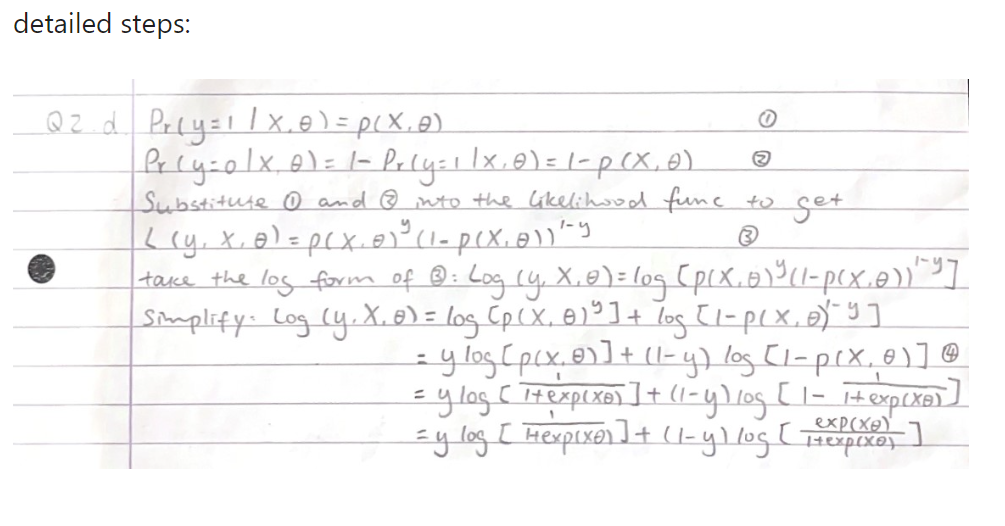

## e)

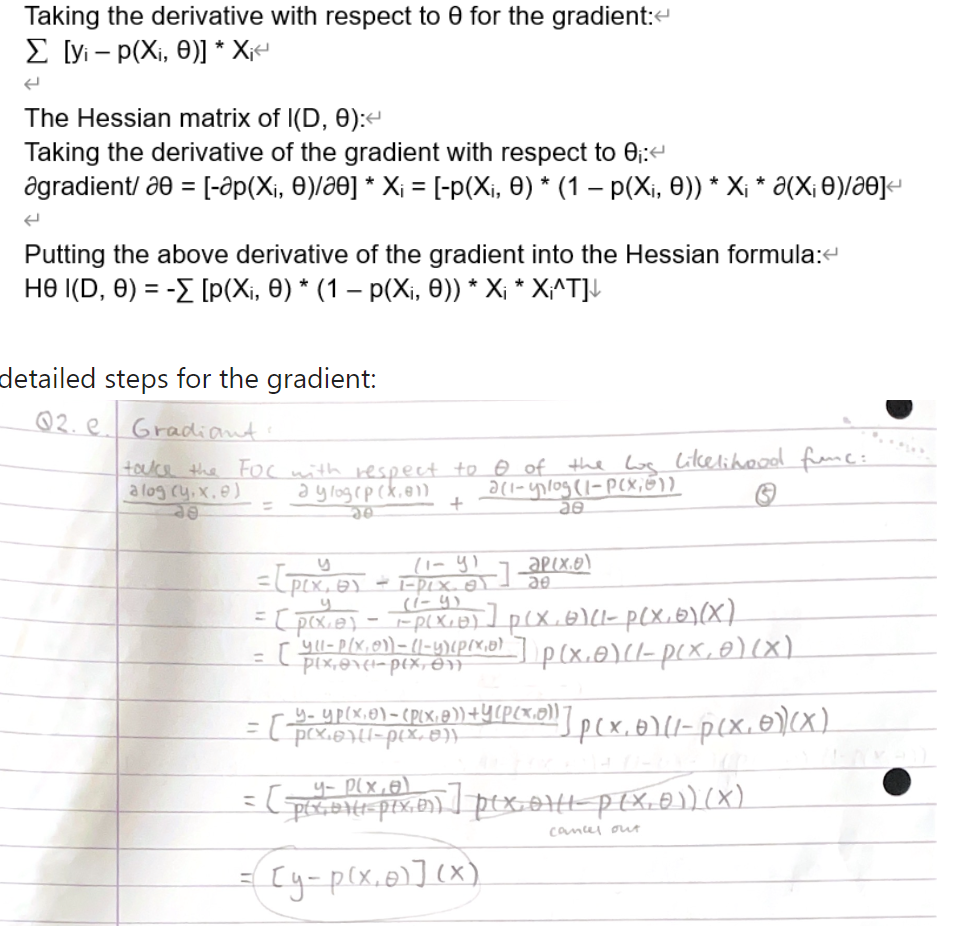

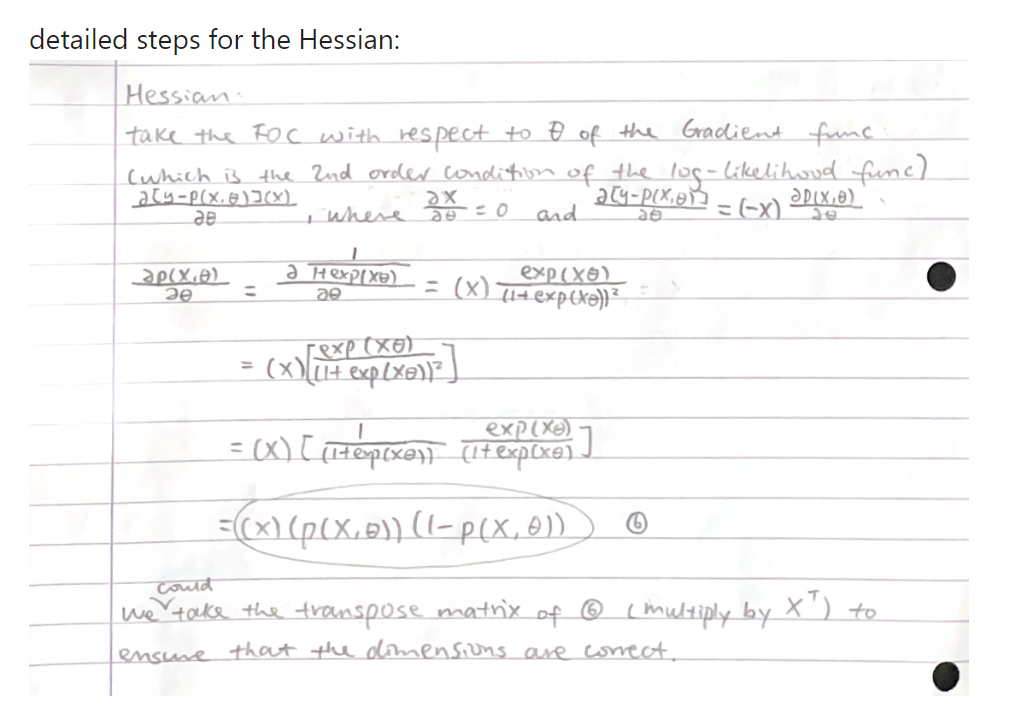




## f)



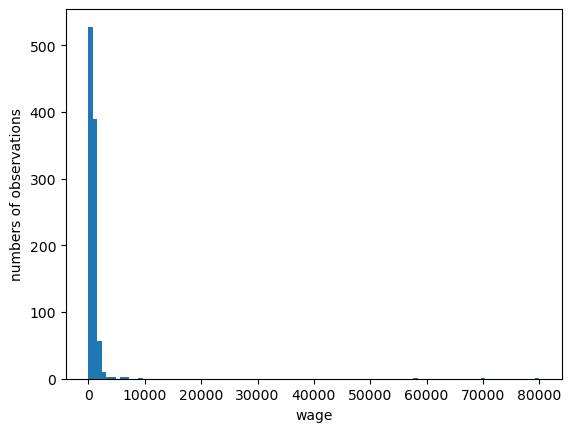

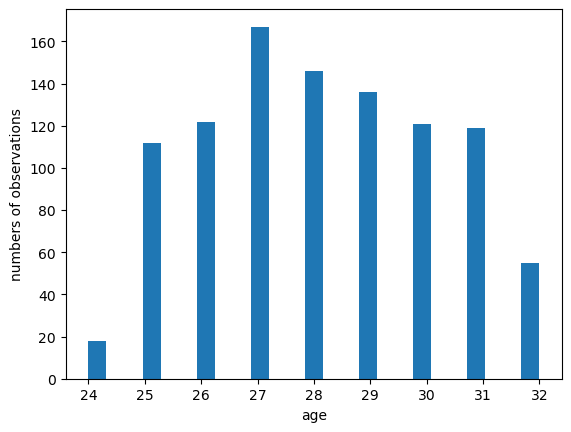

The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.


In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import approx_fprime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
# plot something informative
# the distribution of wage
plt.hist(df['wage'], bins=100)
plt.xlabel('wage')
plt.ylabel('numbers of observations')
plt.show()

# the distribution of age
plt.hist(df['age'], bins=25)
plt.xlabel('age')
plt.ylabel('numbers of observations')
plt.show()

print("The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.")

## g)


In [4]:

# ===== g =====
# function that creates dummies
def dummies(data, var, dummy_name, val):
    if var == "eduyrs":
        # we assign 1 to the education dummy for those with college education for simplicity
        data[dummy_name] = data[var].str.contains("COL").astype(int)
    if var == "welfare":
        data[dummy_name] = data[var].str.contains("YES").astype(int)
    else:
        data[dummy_name] = data[var].apply(lambda x: 1 if x == val else 0)
    return data

# modify the dataframe
# create dummies
df = dummies(df, "sex", "female_dummy", "FEMALE")
df = dummies(df, "race", "white_dummy", "WHITE")
df = dummies(df, "marital", "married_dummy", "MARRIED")
df = dummies(df, "eduyrs", "college_dummy", "blah")
df = dummies(df, "welfare", "welfare_dummy", "blah")
df = dummies(df, "region", "northcentral_dummy", "NORTH CENTRAL")
df = dummies(df, "region", "northeast_dummy", "NORTHEAST")
df = dummies(df, "region", "south_dummy", "SOUTH")
df = dummies(df, "urban", "urban_dummy", "URBAN")
df = dummies(df, "unemprate", "high_unemprate_dummy", "9.0 - 11.9\%")
df = dummies(df, "empstat", "employed", "EMPLOYED")

# drop variables no long needed
df = df.drop(['sex', 'race', 'tenure', 'marital', 'eduyrs', 'welfare', 'region', 'urban', 'unemprate', 'empstat'], axis=1)

In [6]:
# select the predictors and response variable
X = df[['age', 'female_dummy', 'white_dummy', 'married_dummy', 'famsize', 'college_dummy', 'IQ', 'childsupp', 'welfare_dummy', 'northcentral_dummy', 'northeast_dummy', 'south_dummy', 'urban_dummy', 'high_unemprate_dummy']]
y = df['employed']

# print(X)
# print(y)

# functions for the gradient and Hessian found in previous sections

def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

def gradient(thetas, X, y):
    p = logistic(X.dot(thetas))
    grad = X.T.dot(y - p)
    return grad

def log_likelihood(thetas, X, y):
    p = logistic(X.dot(thetas))
    ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    return ll


# set the arrays
X = np.array(X)
y = np.array(y)
# print(X)
theta = np.zeros(X.shape[1])
theta = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
theta0 = theta
# print(theta0)
result = minimize(lambda b: -log_likelihood(b, X, y), theta0, method='BFGS', jac=lambda b: -gradient(b, X, y))
theta_hat = result.x
# print(theta_hat.astype(int))

# use finite differences implementation

# the log-likelihood function to be maximized
def log_likelihood(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# function that computes the gradient using finite differences
def compute_gradient(f, theta, h=0.001):
    grad = np.zeros(theta.shape)
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        grad[i] = (f(theta_plus) - f(theta_minus)) / (2 * h)
    return grad


# function that computes the Hessian using finite differences
def compute_hessian(f, theta, h=0.001):
    n = len(theta)
    hessian = np.zeros((n, n))
    for i in range(n):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        for j in range(i, n):
            theta_plus_j = theta_plus.copy()
            theta_plus_j[j] += h
            theta_minus_j = theta_minus.copy()
            theta_minus_j[j] -= h
            hessian[i, j] = (f(theta_plus_j) - f(theta_plus) - f(theta_minus_j) + f(theta_minus)) / (4 * h**2)
            hessian[j, i] = hessian[i, j]
    return hessian

# set the parameters
n = 996
p = 5
X = np.random.normal(size=(n, p))
theta0 = np.random.normal(size=p)
y = np.random.binomial(n=1, p=1 / (1 + np.exp(-X @ theta0)))

# Compute the gradient and Hessian at the true parameter values
grad_fd = compute_gradient(lambda theta: -log_likelihood(theta, X, y), theta0)
hess_fd = compute_hessian(lambda theta: -log_likelihood(theta, X, y), theta0)

print("Finite difference gradient:\n", grad_fd.astype(int))
print("Finite difference Hessian:\n", hess_fd.astype(int))

# we prefer Newton’s Method
# the log-likelihood function
def log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# the gradient of the log-likelihood function
def grad_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return X.T @ (y - p)

# Dthe Hessian of the log-likelihood function
def hess_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    W = np.diag(p * (1 - p))
    return -X.T @ W @ X

# call the functions for the result
res_NM = minimize(lambda theta: -log_likelihood_NM(theta, X, y), theta0, method='Newton-CG', jac=lambda theta: -grad_log_likelihood_NM(theta, X, y), hess=lambda theta: -hess_log_likelihood_NM(theta, X, y))
print("MLE of theta:", res_NM.x)
print('Maximum log-likelihood:', -res_NM.fun)




C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarning: divide by zero encountered in log
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarning: invalid value encountered in multiply
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarn

Finite difference gradient:
 [-6  5  0 -1  5]
Finite difference Hessian:
 [[-3423  2797   -48  -637  2602]
 [ 2797  2797   -48  -637  2602]
 [  -48   -48   -48  -637  2602]
 [ -637  -637  -637  -637  2602]
 [ 2602  2602  2602  2602  2602]]
MLE of theta: [-2.01280272  0.38802309  0.26844224 -0.17966944 -1.50285256]
Maximum log-likelihood: -399.65006435278565


## i) 


In [7]:
# L-BGFGS and Nelder-Nead
# define the negative log-likelihood function
def neg_log_likelihood_part_i(theta, X, y):
    return -np.sum(y*np.log(1/(1+np.exp(-X.dot(theta)))) + (1-y)*np.log(1-1/(1+np.exp(-X.dot(theta)))))

# call the functions for results
res_LBGFGS = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='L-BFGS-B')
res_NM = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='Nelder-Mead')

print('MLE of theta (L-BGFGS):', res_LBGFGS.x)
print('Maximum log-likelihood (L-BGFGS):', -res_LBGFGS.fun)
print('MLE of theta (L-Nelder-Nead):', res_NM.x)
print('Maximum log-likelihood (L-Nelder-Nead):', -res_NM.fun)

# report
print("The results of the three methods are very close.")

MLE of theta (L-BGFGS): [-2.01279936  0.3880221   0.26843879 -0.17966818 -1.50285135]
Maximum log-likelihood (L-BGFGS): -399.65006435392286
MLE of theta (L-Nelder-Nead): [-2.01281386  0.38804653  0.26842757 -0.17965479 -1.50289416]
Maximum log-likelihood (L-Nelder-Nead): -399.650064478972
The results of the three methods are very close.
